In [241]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
import pickle
from sklearn.decomposition import PCA

#set precision of tensor output 
torch.set_printoptions(precision=10)

**LOADING IMAGES**

<font size=2>unpickle function loads CIFAR10 datset into dictionary.\
File path stored in variable: file (line number 8) must be updated according to the system it is being runned in.\
image_list contains all CIFAR10 images loaded class wise.\
Images are loaded in 3X32X32(CXHXW) format

In [242]:
#function to load CIFAR10 data into a dictionary
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

#file path in local folder
file='D:/sem6/deeplearning-AI5100/assignment2/cifar-10-python/cifar-10-batches-py/data_batch_1'
dic=unpickle(file)

#obtaining keys of dictionary and writing them in list
key=list(dic.keys())

#key[1] contains labels(class number) of images
labels=dic[key[1]]
#key[2] contains corresponding(to label) image data
images=dic[key[2]]

#image_list contains all images sorted class wise
image_list=[[] for i in range(10)]
for i,image in enumerate(images):
    #convert np array(image) to tensor(float) and reshape it into shape(3,32,32)
    tens=(torch.from_numpy(image).reshape(3,32,32)).type(torch.FloatTensor)
    tens=tens/255
    image_list[labels[i]].append(tens)

**QUESTION 1:**

<Font size=2>**Activation Functions**

sigmoid activation function(x)= e^x(1+e^x)\
relu activation function(x)=max(0,x)\
tanh activation function(x)=(e^x-e^(-x))/(e^x+e^(-x))\
parametric relu activation function(x)=max(0,x)+alpha*min(0,x)

In [243]:
#sigmoid activation function(x)= e^x(1+e^x)
def sigmoid(x):
  return torch.exp(x)/(1+torch.exp(x))

#relu activation function(x)=max(0,x)
def RELU(x):
  return torch.maximum(torch.zeros(x.size()),x)

#tanh activation function(x)=(e^x-e^(-x))/(e^x+e^(-x))
def tanh(x):
   return (torch.exp(x)-torch.exp(-x))/(torch.exp(x)+torch.exp(-x))
  
#parametric relu activation function(x)=max(0,x)+alpha*min(0,x).
def parametric_RELU(x,alpha=0.01):
    return torch.maximum(torch.zeros(x.size()),x)+alpha*torch.minimum(torch.zeros(x.size()),x)

<Font size=2>**Padding Function**

In [244]:
def padding_function(inp,padding):
  #defining a zero tensor with required output shape
  padded_tensor=torch.zeros([inp.shape[0],inp.shape[1]+2*padding[0],inp.shape[2]+2*padding[1]])

  for i in range(padded_tensor.shape[0]):
     padded_tensor[i,padding[0]:padded_tensor.shape[1]-padding[0],padding[1]:padded_tensor.shape[2]-padding[1]]=inp[i]
     
  return padded_tensor


<Font size=2>**CONVOLUTION FUNCTION**

In [245]:
def convolution_function(input,kernel,stride=torch.tensor([1,1]),padding=torch.tensor([0,0]),func=sigmoid):
  #applying padding to input
  padded_inp=padding_function(input,padding)

  #h,w are height and width of kernel
  h=kernel.shape[1]
  w=kernel.shape[2]

  #H,W are height and width of input
  H=padded_inp.shape[1]
  W=padded_inp.shape[2]


  #creating an output zero tensor with required size
  output=torch.zeros([1,((H-h)//stride[0])+1,((W-w)//stride[1])+1])


  i1=0
  j1=0

  #applying convolution
  for i in range(0,H-h+1,stride[0]):
    j1=0
    for j in range(0,W-w+1,stride[1]):
      output[0][i1][j1]=func(torch.mul(padded_inp[:,i:i+h,j:j+w],kernel).sum())
      j1+=1
    i1+=1


  return output


<Font size=2>**Printing outputs**\
prints input image,filter kernel and output activation map for different activation functions

input image=


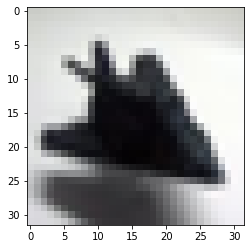

filter kernel= tensor([[[0.7431446314, 0.8424611688, 0.7571858168],
         [0.3426302075, 0.4688355327, 0.1654633284],
         [0.7201457620, 0.1477375627, 0.4922156930]],

        [[0.5878730416, 0.7031455636, 0.8524572253],
         [0.0880436301, 0.8709796071, 0.1328058243],
         [0.7062750459, 0.8900207281, 0.7999311686]],

        [[0.1097980738, 0.7082744241, 0.5206379890],
         [0.9600731134, 0.4052015543, 0.8918163776],
         [0.7783516645, 0.9596872330, 0.6908290982]]])
SIGMOID output activation map= tensor([[[0.9960381389, 0.9997780323, 0.9997886419,  ..., 0.9997994900,
          0.9997837543, 0.9971700311],
         [0.9998899102, 0.9999982119, 0.9999983311,  ..., 0.9999984503,
          0.9999982715, 0.9998662472],
         [0.9999052882, 0.9999985695, 0.9999986887,  ..., 0.9999988079,
          0.9999986291, 0.9998856187],
         ...,
         [0.9999080300, 0.9999975562, 0.9999915957,  ..., 0.9999998212,
          0.9999998212, 0.9999739528],
         [0.9

In [246]:
#testing convolution function
padding=torch.tensor([1,1])
inp =  image_list[0][0]
kernel=torch.rand([inp.shape[0],3,3])

#printing input image
print('input image=')
plt.imshow(inp.permute(1,2,0))
plt.show()

#printing filter kernel
print('filter kernel=',kernel)

conv_output=convolution_function(input=inp,kernel=kernel,func=sigmoid)

#print output activation map for different activation functions
print('SIGMOID output activation map=',convolution_function(input=inp,padding=padding,kernel=kernel,func=sigmoid))
print('RELU output activation map=',convolution_function(input=inp,padding=padding,kernel=kernel,func=RELU))
print('tanh output activation map=',convolution_function(input=inp,padding=padding,kernel=kernel,func=tanh))
print('PARAMETRIC RELU output activation map=',convolution_function(input=inp,padding=padding,kernel=kernel,func=parametric_RELU))

**QUESTION 2**

<font size=2>**Avg pooling function:**
(sum of all elements in matrix)/(number of elements in matrix)\
**Max pooling function:**
max(elements in matrix)

In [247]:
#average pooling function
def avg_pool(tens):
  return tens.sum()/(tens.shape[0]*tens.shape[1])

#max pooling function
def max_pool(tens):
  return torch.max(tens)

<Font size=2> **POOLING FUNCTION**

In [248]:
def pooling_function(inp,stride,pooling_func,kernel_size=None):
  if kernel_size==None:
    kernel_size=torch.tensor([stride[0],stride[1]])
  #h,w are height and width of kernel
  h=kernel_size[0]
  w=kernel_size[1]

  #H,W are height and width of input
  H=inp.shape[1]
  W=inp.shape[2]

  #creating an output zero tensor with required size
  output=torch.zeros([1,((H-h)//h)+1,((W-w)//w)+1])
 
  i1=0
  j1=0

  #pooling function
  for i in range(0,H-h+1,stride[0]):
    j1=0
    for j in range(0,W-w+1,stride[1]):
        output[0][i1][j1]=pooling_func(inp[0,i:i+h,j:j+w])
        j1+=1
    i1+=1
    
  return output


<Font size=2>**Printing outputs**\
prints input activation map,pooled output

In [249]:
#testng pooling function
inp =  conv_output
stride=torch.tensor([3,3])

#printing input activation map
print('input activation map=',inp)

#print pooled outputs
print('avg pooling output=',pooling_function(inp,stride,avg_pool))
print('max pooling output=',pooling_function(inp,stride,max_pool))

input activation map= tensor([[[0.9999982119, 0.9999983311, 0.9999985099, 0.9999986887, 0.9999988079,
          0.9999989271, 0.9999989867, 0.9999991059, 0.9999991655, 0.9999992251,
          0.9999992251, 0.9999992847, 0.9999992847, 0.9999992847, 0.9999992847,
          0.9999992847, 0.9999992847, 0.9999992847, 0.9999992847, 0.9999991655,
          0.9999991655, 0.9999991059, 0.9999991059, 0.9999989867, 0.9999989271,
          0.9999988079, 0.9999987483, 0.9999986291, 0.9999984503, 0.9999982715],
         [0.9999985695, 0.9999986887, 0.9999988675, 0.9999989867, 0.9999990463,
          0.9999991655, 0.9999992251, 0.9999992847, 0.9999993443, 0.9999994040,
          0.9999994636, 0.9999994636, 0.9999994636, 0.9999994636, 0.9999994636,
          0.9999994636, 0.9999995232, 0.9999995232, 0.9999994636, 0.9999994040,
          0.9999994040, 0.9999993443, 0.9999993443, 0.9999992847, 0.9999992251,
          0.9999991655, 0.9999990463, 0.9999989271, 0.9999988079, 0.9999986291],
         [0.9999

**QUESTION 3**

<Font size=2>**Convolution Layer Function**

In [250]:
def convolution_layer_function(input,number_of_filters,kernel_dimensions,stride=torch.tensor([1,1]),padding=torch.tensor([0,0]),non_linear_function=sigmoid,kernel=None):
  
  #randomly initializing kernel if no kernel is given
  if kernel==None:
    kernel=torch.rand([number_of_filters,input.shape[0],kernel_dimensions[0],kernel_dimensions[1]])

  #applying convolution for given number of filters
  for i in range(number_of_filters):
    if i==0:
      output=convolution_function(input,kernel[i],stride,padding,non_linear_function)
    else:
      output=torch.cat((output,convolution_function(input,kernel[i],stride,padding,non_linear_function)))

      
  return output

<Font size=2>**Printing outputs**\
prints input image,filter kernel and output activation map for different activation functions

input image=


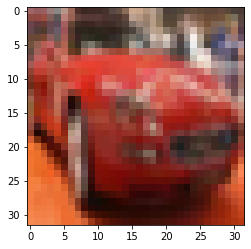

filter kernel= tensor([[[[0.4673201442, 0.6773141026, 0.5897606015],
          [0.2458706498, 0.2010659575, 0.3820259571],
          [0.9840633273, 0.2748239636, 0.8604996800]],

         [[0.7687978745, 0.6626182795, 0.7198022604],
          [0.8228549957, 0.9433235526, 0.2695923448],
          [0.4867876768, 0.5752925873, 0.1459161639]],

         [[0.9439978600, 0.7113342285, 0.7732119560],
          [0.2823778987, 0.1075371504, 0.5777339935],
          [0.7078145742, 0.5011283755, 0.6453835964]]],


        [[[0.4076392651, 0.0728557110, 0.2639546394],
          [0.9357873201, 0.7145095468, 0.5950982571],
          [0.3375608325, 0.8435733318, 0.9041685462]],

         [[0.2865129709, 0.8995865583, 0.7063716650],
          [0.7555588484, 0.9348893166, 0.1382843852],
          [0.7246071696, 0.7431226969, 0.9103741646]],

         [[0.2124872208, 0.9642084837, 0.2802757621],
          [0.4853015542, 0.7866694331, 0.3642090559],
          [0.5517060161, 0.4613213539, 0.0111625195]]],

In [251]:
#testing convolution layer function
inp =  image_list[1][1]
kernel=torch.rand([8,inp.shape[0],3,3])

#printing input image
print('input image=')
plt.imshow(inp.permute(1,2,0))
plt.show()

#printing filter kernel
print('filter kernel=',kernel)

conv_layer_output=convolution_layer_function(input=inp,number_of_filters=8,kernel_dimensions=torch.tensor([3,3]),kernel=kernel,non_linear_function=sigmoid)

#print output activation map for different activation functions
print('SIGMOID output activation map=',convolution_layer_function(input=inp,number_of_filters=8,kernel_dimensions=torch.tensor([3,3]),non_linear_function=sigmoid,kernel=kernel))
print('RELU output activation map=',convolution_layer_function(input=inp,number_of_filters=8,kernel_dimensions=torch.tensor([3,3]),non_linear_function=RELU,kernel=kernel))
print('tanh output activation map=',convolution_layer_function(input=inp,number_of_filters=8,kernel_dimensions=torch.tensor([3,3]),non_linear_function=tanh,kernel=kernel))
print('PARAMETRIC RELU output activation map=',convolution_layer_function(input=inp,number_of_filters=8,kernel_dimensions=torch.tensor([3,3]),non_linear_function=parametric_RELU,kernel=kernel))

**Verification that output has expected size:**

Input size(NXHXW)=3X32X32\
kernel size(CXNXhXw)= 8X3X32X32\
stride=[1,1]\
padding=[0,0]\
Expected output height(H1)= ((H+2*padding[0]-h)//stride[0])+1=32-3+1=30\
Expected output width(W1)= ((H+2*padding[1]-h)//stride[1])+1=32-3+1=30\
Expected output size=(CXH1XW1)=(8X30X30)

In [252]:
print('Expected  number of channels(C)=8  output number of channels=',conv_layer_output.shape[0])
print('Expected height(H)=30  output height=',conv_layer_output.shape[1])
print('Expected width(W)=30  output width=',conv_layer_output.shape[2])
#output has expected size

Expected  number of channels(C)=8  output number of channels= 8
Expected height(H)=30  output height= 30
Expected width(W)=30  output width= 30


**QUESTION 4**

<Font size=2>**Global Average pooling**

In [253]:
#returning stride(=shape of matrix) required for global average pooling
def global_avg_pool(input):
  return torch.tensor([input.shape[2],input.shape[1]])

<Font size=2> **POOLING LAYER FUNCTION**

In [254]:
def pooling_layer_function(input,stride=torch.tensor([2,2]),pooling_func=global_avg_pool,kernel_size=None):

  if kernel_size==None:
    kernel_size=torch.tensor([stride[1],stride[0]])

  #h,w are height and width of kernel
  h=kernel_size[0]
  w=kernel_size[1]

  #H,W are height and width of kernel
  H=input.shape[1]
  W=input.shape[2]

  #special case for global average pooling
  if pooling_func==global_avg_pool:
    #changing stride to shape of matrix and applying normal average pooling
    stride=global_avg_pool(input)
    pooling_func=avg_pool

  #pooling function for input
  for i in range(input.shape[0]):
    if i==0:
        output=pooling_function(input[i].reshape(1,H,W),stride,pooling_func)
    else:
        output=torch.cat((output,pooling_function(input[i].reshape(1,H,W),stride,pooling_func)))
        

  return output


<Font size=2>**Printing outputs**\
prints input activation map,pooled output

In [255]:
#testng pooling layer function
inp =  conv_layer_output
stride=torch.tensor([3,3])

#printing input activation map
print('input activation map=',inp)

pooling_output=pooling_layer_function(inp,stride,avg_pool)
#print pooled outputs
print('global pooling output=',pooling_layer_function(inp))
print('avg pooling output=',pooling_layer_function(inp,stride,avg_pool))
print('max pooling output=',pooling_layer_function(inp,stride,max_pool))

input activation map= tensor([[[0.9968085289, 0.9972109199, 0.9978395104,  ..., 0.9949443340,
          0.9962555766, 0.9945847988],
         [0.9919607043, 0.9928235412, 0.9940021634,  ..., 0.9969465137,
          0.9981991053, 0.9971920252],
         [0.9889362454, 0.9913248420, 0.9937562943,  ..., 0.9977742434,
          0.9987712502, 0.9985278845],
         ...,
         [0.9997484088, 0.9997076392, 0.9996873140,  ..., 0.9835728407,
          0.9926624894, 0.9966350198],
         [0.9997806549, 0.9997646213, 0.9997476339,  ..., 0.9783036113,
          0.9882839322, 0.9943957329],
         [0.9998308420, 0.9998200536, 0.9998026490,  ..., 0.9789892435,
          0.9862688184, 0.9921088219]],

        [[0.9964477420, 0.9968137145, 0.9976077080,  ..., 0.9960563779,
          0.9973738790, 0.9965733886],
         [0.9906333089, 0.9909416437, 0.9942150712,  ..., 0.9974722862,
          0.9986022711, 0.9981396794],
         [0.9893713593, 0.9905620813, 0.9943696260,  ..., 0.9977580905,
  

**QUESTION 5**

<Font size=2>**FLATTENING**

In [256]:
#it reshapes the matrix into a vector . Using weight matrix it converts vector to desired length
def flattening(input,output_vector_length,weight_matrix=None):
  input=input.reshape(-1)
  #randomly initializing weight matrix if it is not given
  if weight_matrix==None:
    weight_matrix=torch.rand([input.shape[0],output_vector_length])
  return weight_matrix.T@input

<Font size=2>**Printing outputs**\
prints input,flattened output

In [257]:
#printing input and output
Flat_output=flattening(pooling_output,10)
print('input=',pooling_output)
print('output=',Flat_output.shape,Flat_output)

input= tensor([[[0.9938514233, 0.9965384007, 0.9534098506, 0.9482126236, 0.9866490960,
          0.9996857047, 0.9972437620, 0.9986917973, 0.9967099428, 0.9970217943],
         [0.9971296787, 0.9959545135, 0.9829770327, 0.9780254364, 0.9917511344,
          0.9996210933, 0.9995211363, 0.9991723299, 0.9990736842, 0.9989347458],
         [0.9981204271, 0.9987933040, 0.9986392260, 0.9988882542, 0.9990505576,
          0.9994976521, 0.9990847111, 0.9993624091, 0.9999542236, 0.9994866848],
         [0.9900511503, 0.9979474545, 0.9954687953, 0.9989968538, 0.9993458986,
          0.9998028278, 0.9997441769, 0.9998099208, 0.9997220635, 0.9994498491],
         [0.9932183027, 0.9877082109, 0.9811509252, 0.9935768843, 0.9953954220,
          0.9986281991, 0.9981501698, 0.9947039485, 0.9964982271, 0.9984667301],
         [0.9807510376, 0.9942966104, 0.9945369363, 0.9914569855, 0.9905673265,
          0.9952151179, 0.9888113737, 0.9768208265, 0.9850392938, 0.9827075601],
         [0.9818050861, 0.9

**QUESTION 6**

<Font size=2> **Softmax function**\
e^x/sum(e^x)

In [258]:
#softmax function
def softmax(output):

  for i in range(output.shape[0]):
    output[i]=torch.exp(output[i])


  output=output/output.sum()
  
  return output

<Font size=2>**MULTI LAYER PERCEPTRON FUNCTION**

In [259]:
def mlp(inp_vector,number_of_hidden_layers,hidden_layer_size,non_linear_function,output_layer_size,kernel_list=None):

  inp_vector_length=inp_vector.shape[0]

   #randomly initializing weight matrix if it is not given
  if kernel_list==None:
    inp_weight=torch.rand([inp_vector_length,hidden_layer_size])
    output_weight=torch.rand([hidden_layer_size,output_layer_size])
    weight_matrix=torch.rand([number_of_hidden_layers-1,hidden_layer_size,hidden_layer_size])


  #assigning weights given in kernel_list to variables
  else:
    inp_weight=kernel_list[0]
    output_weight=kernel_list[1]
    weight_matrix=kernel_list[2]


  #for input layer
  output=non_linear_function(inp_weight.T@inp_vector)

  #loop for hidden layers
  for i in range(number_of_hidden_layers-1):
    output=non_linear_function(weight_matrix[i].T@output)

  #for output layer
  output=(output_weight.T@output)

  
  return output,softmax(output)


<Font size=2>**Printing outputs**\
prints mlp input, output

In [260]:
#printing input and outputs
inp=Flat_output/400
mlp_output=mlp(inp,1,5,sigmoid,2)

print('input=',inp)

print('output without softmax=',mlp_output[0])
print('output with softmax=',mlp_output[1])


input= tensor([0.9756155610, 0.9848089814, 0.9545490146, 0.9490607381, 1.0006829500,
        0.9558541775, 0.9993510246, 0.9687268138, 0.9754878283, 0.9963008761])
output without softmax= tensor([47.4512710571, 10.6163473129])
output with softmax= tensor([0.8171726465, 0.1828273237])


**QUESTION 7**

<font size=2>**FEED FORWARD PATH**

In [261]:
def feed_forward_path(inp,kernel_list=None):

  #setting kernels to none if kernel_list is not given
  if kernel_list==None:
    kernel_list=[None,None,None,None]


  #Convolution layer with 16 kernels of size 3 × 3 spatial dimensions and sigmoid activation.
  output=convolution_layer_function(input=inp,number_of_filters=16,kernel_dimensions=torch.tensor([3,3]),non_linear_function=sigmoid,kernel=kernel_list[0])
  

  # Max pooling layer of size 2 × 2 with a stride of 2 along each dimension.
  output=pooling_layer_function(input=output,stride=torch.tensor([2,2]),pooling_func=max_pool,kernel_size=torch.tensor([2,2]))


  #Convolution layer with 8 kernels of spatial size 3 × 3 and sigmoid activation.
  output=convolution_layer_function(input=output,number_of_filters=8,kernel_dimensions=torch.tensor([3,3]),non_linear_function=sigmoid,kernel=kernel_list[1])


  #Max pooling layer of size 2 × 2 with a stride of 2 along each dimension
  output=pooling_layer_function(input=output,stride=torch.tensor([2,2]),pooling_func=max_pool,kernel_size=torch.tensor([2,2]))


  #A Global Average Pooling (GAP) layer.
  output=pooling_layer_function(input=output)

  
  output=flattening(output,output.size(0),weight_matrix=kernel_list[2])
  mlp_input=output

  #An MLP with one hidden layer (size same as input) that accepts as input the previous layer’s output and maps it to 10 output nodes. Use sigmoid activation for the MLP (softmax in the o/p layer).
  output=mlp(inp_vector=output,number_of_hidden_layers=1,hidden_layer_size=output.shape[0],non_linear_function=sigmoid,output_layer_size=10,kernel_list=kernel_list[3])


  return output[0],output[1],mlp_input

<Font size=2>**Printing outputs**\
prints feed forward input(image), output(vector)

input image=


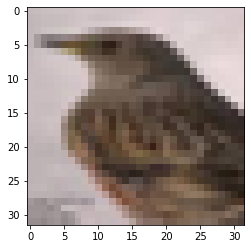

output after softmax= tensor([0.0990286916, 0.0233638752, 0.4987521470, 0.1527588814, 0.0459361933,
        0.0326926410, 0.0380975790, 0.0617306083, 0.0372269340, 0.0104125226]) torch.Size([10])


In [262]:
#testing feed forward function
inp =  image_list[2][2]

#printing input image
print('input image=')
plt.imshow(inp.permute(1,2,0))
plt.show()

#print feed_forward output
ff_out=feed_forward_path(inp)
print('output after softmax=',ff_out[1],ff_out[1].shape)

**QUESTION 8a:**


In [263]:
#creating a kernel_list which contains all randomly initialized required for convolution_layer_function,flattening,mlp functions
kernel_list=[]

#appending kernel required for 1st convoltion_layer_function
kernel_list.append(torch.rand([16,3,3,3])/100)

#appending kernel required for 2nd convoltion_layer_function
kernel_list.append(torch.rand([8,16,3,3])/100)

#appending weight matrix required for flattening function
kernel_list.append(torch.rand([8,8]))

#creating weight_matrix list containing required weights for mlp function
weight_matrix=[]
weight_matrix.append(torch.rand([8,5]))
weight_matrix.append(torch.rand([5,10]))
weight_matrix.append(torch.rand([4,5,5]))

#appending weight matrix required for mlp function
kernel_list.append(weight_matrix)

#selecting an image from each of the 10 classes and displaying the output vector for each case.
for i in range(10):
    print('class',i,'output=',feed_forward_path(image_list[i][0],kernel_list)[1])
    

class 0 output= tensor([0.2723104358, 0.0468355641, 0.0828735903, 0.0735564083, 0.1768710315,
        0.0704051480, 0.2090381384, 0.0205016211, 0.0323970057, 0.0152109871])
class 1 output= tensor([0.2723103762, 0.0468355678, 0.0828736201, 0.0735564381, 0.1768710464,
        0.0704051480, 0.2090381533, 0.0205016304, 0.0323970132, 0.0152109927])
class 2 output= tensor([0.2723103762, 0.0468355678, 0.0828736201, 0.0735564381, 0.1768710464,
        0.0704051480, 0.2090381533, 0.0205016304, 0.0323970132, 0.0152109927])
class 3 output= tensor([0.2723103464, 0.0468355604, 0.0828736126, 0.0735564977, 0.1768709868,
        0.0704051405, 0.2090381384, 0.0205016416, 0.0323970169, 0.0152110057])
class 4 output= tensor([0.2723104358, 0.0468355641, 0.0828736126, 0.0735564828, 0.1768710166,
        0.0704051554, 0.2090381384, 0.0205016378, 0.0323970132, 0.0152110010])
class 5 output= tensor([0.2723103464, 0.0468355604, 0.0828736126, 0.0735564977, 0.1768710315,
        0.0704051554, 0.2090381384, 0.020

**Analysis for 8a**\
**Trend observed:** We observe that all images(one from each class), same(approximately) output vector.\
**Reason:** Our model is not trained. So, it outputs same vector for evry image.

**QUESTION 8b**

<Font size=2> **Loading 3 images from each class.**

In [264]:
#Storing 3 images from each class in pca_input. Storing class number of corresponding images in pca_classno
pca_input=[]
pca_classno=np.zeros([30,1])
k=0
for classno in range(10):
    for img in range(3):
        pca_input.append((feed_forward_path(image_list[classno][img],kernel_list)[2]).numpy())
        pca_classno[k]=classno
        k=k+1

pca_input=np.array(pca_input)


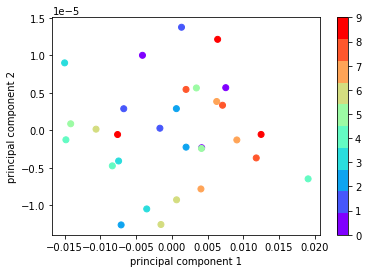

In [265]:

pca=PCA(n_components=2)

#reducing dimensions of stored flattening layer output to 2D so that we can visualizein 2D
reduced_dim=pca.fit_transform(pca_input)


plt.scatter(reduced_dim[:,0],reduced_dim[:,1],c=pca_classno,cmap=plt.get_cmap('rainbow',10))
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.colorbar()
plt.show()

**Analysis for 8b**\
Randomly initialized network doesn't show any discriminability.\
Here, after performing PCA, we can see that images of same class are not clustered together. Since our model is not trained and randomly initialized, same class images are not clustered together